## Montecarlo Simulation Examples


In [1]:
import numpy as np
import pandas as pd

In [14]:
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap
from bokeh.models import CategoricalColorMapper, ColorBar
from bokeh.palettes import Viridis256
from bokeh.models import ColumnDataSource
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Task 1 - Transfer Function; Y = function(X1, X2, etc)
          Triange made of 3 bars, AB, BC, CA 
           Each bar is 100 units in length
          Angle C is 60 degrees as designed
          Mfg variation in bars (Manufacturing Tolerance) +/- 1.0 
          Calculate Angle Distribution

Manufacturing Tolerance: The manufacturing variation is specified as +/- 1 unit. This means that the actual length of each bar can vary by up to 1 unit from the designed length.
Standard Deviation: In the context of a normal distribution, about 99.73% of the data falls within three standard deviations of the mean. By setting the standard deviation to 1/3, we are effectively covering the manufacturing tolerance range ( 3 std == 1).
Coverage of Manufacturing Variation: With a standard deviation of  one-third of the distribution falls to the right of the mean, and one-third falls to the left. This covers the full range of the manufacturing tolerance (+/- 1 unit).
Probability Coverage: By covering three standard deviations on either side of the mean, they are encompassing approximately 99.73% of the possible outcomes, which means they are accounting for nearly all possible variations due to manufacturing.
So, setting the standard deviation to effectively ensures that the generated random values cover the manufacturing tolerance specified (+/- 1 unit) and account for the majority of the variation expected in the manufacturing process.


Tarea 1 - Función de Transferencia; Y = función(X1, X2, etc.)
Triángulo formado por 3 barras, AB, BC, CA
Cada barra tiene una longitud de 100 unidades
El ángulo C es de 60 grados según el diseño
Variación de fabricación en las barras (Tolerancia de fabricación) +/- 1.0
Calcular la Distribución de Ángulos

Tolerancia de Fabricación: La variación de fabricación se especifica como +/- 1 unidad. Esto significa que la longitud real de cada barra puede variar hasta 1 unidad de la longitud diseñada.
Desviación Estándar: En el contexto de una distribución normal, aproximadamente el 99.73% de los datos caen dentro de tres desviaciones estándar de la media. Al establecer la desviación estándar en 1/3, efectivamente estamos cubriendo el rango de tolerancia de fabricación (3 std == 1).
Cobertura de Variación de Fabricación: Con una desviación estándar de un tercio, un tercio de la distribución cae a la derecha de la media y un tercio cae a la izquierda. Esto cubre todo el rango de la tolerancia de fabricación (+/- 1 unidad).
Cobertura de Probabilidad: Al cubrir tres desviaciones estándar a cada lado de la media, estamos abarcando aproximadamente el 99.73% de los resultados posibles, lo que significa que estamos teniendo en cuenta casi todas las posibles variaciones debido a la fabricación.
Por lo tanto, establecer la desviación estándar asegura que los valores aleatorios generados cubran la tolerancia de fabricación especificada (+/- 1 unidad) y tengan en cuenta la mayoría de las variaciones esperadas en el proceso de fabricación.

In [3]:
# Generate random values from a normal distribution / Generamos valores aleatorios con distribución normal
# np.random.normal(mean, standard_deviation, size)
AB = np.random.normal(100, 1/3, 1000)
AC=np.random.normal(100, 1/3, 1000)
CB=np.random.normal(100, 1/3, 1000)

In [4]:

# Applying the cosine law
AngleC = np.arccos((CB**2 + AC**2 - AB**2) / (2 * CB * AC))

# Converting radians to degrees
AngleC_deg = np.degrees(AngleC)

In [5]:
# Calculating mean and standard deviation
mean_angle = np.mean(AngleC_deg)
std_dev_angle = np.std(AngleC_deg)

In [6]:
print('Mean of angle C:', mean_angle)
print('Standard deviation of angle C:',std_dev_angle)


Mean of angle C: 60.00205950476664
Standard deviation of angle C: 0.26007990591089714


# Create the distribution using, bokeh, plotly and seaborn

## Plotly

In [7]:
fig = go.Figure(data=[go.Histogram(x=AngleC_deg)])
fig.update_layout(title='Histogram of AngleC_deg', xaxis_title='Angle (degrees)', yaxis_title='Frequency')
fig.show()

## Bokeh

In [8]:
output_notebook()

hist, edges = np.histogram(AngleC_deg, bins=30)

p = figure(title="Histogram of AngleC_deg", x_axis_label='Angle (degrees)', y_axis_label='Frequency')

# Add histogram bars
color_mapper = linear_cmap(field_name='top', palette=Viridis256, low=min(hist), high=max(hist))
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color=color_mapper)

# Add color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], width=8, location=(0, 0))
p.add_layout(color_bar, 'right')

# Compute Gaussian curve
x_values = np.linspace(min(edges), max(edges), 1000)
mean_angle = np.mean(AngleC_deg)
std_dev_angle = np.std(AngleC_deg)
y_values = 1 / (std_dev_angle * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_values - mean_angle) / std_dev_angle) ** 2)

# Gaussian curve
p.line(x=x_values, y=y_values * len(AngleC_deg) * (edges[1] - edges[0]), line_width=2, color='black', legend_label='Gaussian Curve')

# mean line
p.line(x=[mean_angle, mean_angle], y=[0, max(hist)], line_width=2, color='blue', legend_label='Mean')

# dotted lines for standard deviations
for i in range(-3, 4):
    p.line(x=[mean_angle + i * std_dev_angle, mean_angle + i * std_dev_angle], y=[0, max(hist)], line_width=1, line_dash='dotted', color='blue')

show(p)

Loading BokehJS ...

## Seaborn

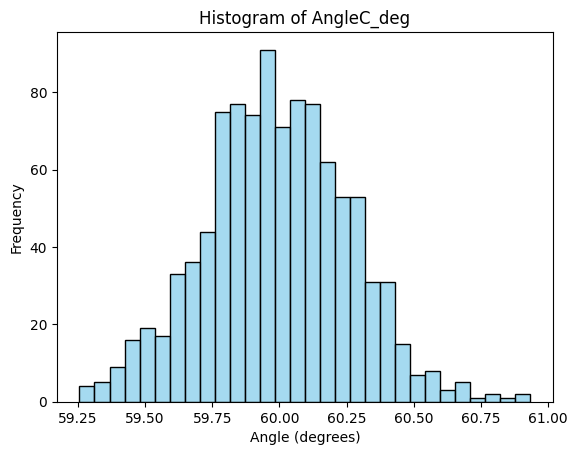

In [11]:

# Create histogram using Seaborn
sns.histplot(AngleC_deg, bins=30, kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of AngleC_deg')

# Show legend

#plt.legend()

# Show plot
plt.show()

 Task 4 - Transfer Function; Y = function(X1, X2, etc)
          Florist Business 
          Small, Medium, Large (Profit: $5, $7, $10)
         Avg. Orders (20,15,10)
        Cake Orders (Profit: $10) - 5% orders
          Chocolates  (Profit: $3)  - 10% orders
          If > 50 bouquets are in a day
        handling costs 10% of the profit
          Calculate Annual Profit Distribution

 Task 4 - Función de transferencia; Y = function(X1, X2, etc)
          Negocio de Flores 
          Pequeño, Medio, Grande (Utilidad: $5, $7, $10)
          Promedio de órdenes (20,15,10)
          Órdenes de pasteles (Utilidad: $10) - 5% órdenes
          Chocolates  (Utilidad: $3)  - 10% órdenes
          Si > 50 bouquets son en un día
               costos de manipulación son 10% de la utilidad
          Calcular la distribución de ganancias anuales.

In [4]:
VS = 20; VM = 15; VL = 10   #promedio de órdenes  
PS = 5;  PM = 7;  PL = 10   #utilidad por tipo de orden
XCake = 0.05; XChoc = 0.10  #porcentaje de órdenes de pastel y chocolates
PCake =  10;  PChoc = 3; Max = 50 #utilidad por pastel y chocolates, numero de ordenes maximas 50
VCake = XCake * (VS+VM+VL) #volumen de ordenes de pastel
VChoc = XChoc * (VS+VM+VL)    #volumen de ordenes de chocolates


In [5]:
def getprofit(VS,VM,VL, PS,PM,PL, VCake,VChoc, PCake,PChoc, Max):
    profit=VS*PS+VM*PM+VL*PL+VCake*PCake+VChoc*PChoc
    if VS+VL+VM>50:
        profit==0.9*profit
    return profit

In [6]:
getprofit(VS,VM,VL, PS,PM,PL, VCake,VChoc, PCake,PChoc+3, Max)

354.5

# Step 2 - Generate Simulated Xs
#          From Statistical Distributions
#          Vectors prefixed with "x"

In [12]:
# Simulate values following poisson and binomial distribution. / Simulamos los valores siguiendo distribucions de Poisson y Binomial.
n=365
xVS = np.random.poisson(VS, n)
xVM = np.random.poisson(VM, n)
xVL = np.random.poisson(VL, n)

In [13]:
xVCake = np.random.binomial(VS+VL+VM, XCake, n)
xVChoc = np.random.binomial(VS+VL+VM, XChoc, n)

In [18]:
# Create a data frame containing the simulated values and the fixed values like 'Price_Small' to perform the calculations 
#/ Crear un data frame que contiene los valores simulados y valores fijos como 'Price_small'
df = pd.DataFrame({ 
    'Qty_Small': xVS,
    'Qty_Medium':xVM,
    'Qty_Large':xVL,
    'Price_Small':5,
    'Price_Medium':7,
    'Price_Large':10,
    'Qty_Cake': xVCake,
    'Qty_Choc': xVChoc,
    'Price_Cake':10,
    'Price_Choc':3,
    'Qty_penalty':50
    

})

In [19]:
df.head()

,Qty_Small,Qty_Medium,Qty_Large,Price_Small,Price_Medium,Price_Large,Qty_Cake,Qty_Choc,Price_Cake,Price_Choc,Qty_penalty
0,22,22,9,5,7,10,1,2,10,3,50
1,26,11,12,5,7,10,2,6,10,3,50
2,18,14,16,5,7,10,4,5,10,3,50
3,16,8,9,5,7,10,1,6,10,3,50
4,17,12,10,5,7,10,2,3,10,3,50


In [20]:
#Create the function to calculate the profit / Crear la funcion para calcular el promedio
def getprofit1(row):
    VS = row['Qty_Small']
    VM = row['Qty_Medium']
    VL = row['Qty_Large']
    PS = row['Price_Small']
    PM = row['Price_Medium']
    PL = row['Price_Large']
    VCake = row['Qty_Cake']
    VChoc = row['Qty_Choc']
    PCake = row['Price_Cake']
    PChoc = row['Price_Choc']
    Max = row['Qty_penalty']
    
    profit = VS * PS + VM * PM + VL * PL + VCake * PCake + VChoc * PChoc
    if VS + VL + VM > 50:
        profit *= 0.9
    return profit

In [21]:
#Apply the function to each row and store the results in 'df1' / Aplicar funcion a cada fila y almacenar en df1
df1 = df.apply(getprofit1, axis=1)

In [22]:
df1.describe()

count    365.000000
mean     333.393151
std       42.058822
min      219.000000
25%      305.000000
50%      337.000000
75%      361.000000
max      433.800000
dtype: float64

In [23]:
df1.mean()

333.3931506849315

# We will generate a graphic using Bokeh
Generamos un grafico usando Bokeh

In [27]:
output_notebook()

hist, edges = np.histogram(df1, bins=30)

p = figure(title="Histogram of Simulated profit", x_axis_label='Profit', y_axis_label='Frequency')

# Add histogram bars
color_mapper = linear_cmap(field_name='top', palette=Viridis256, low=min(hist), high=max(hist))
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color=color_mapper)

# Add color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], width=8, location=(0, 0))
p.add_layout(color_bar, 'right')
# Compute Gaussian curve / Computar la curva gaussiana
x_values = np.linspace(min(edges), max(edges), 1000)
mean_profit = np.mean(df1)
std_dev_profit = np.std(df1)
y_values = 1 / (std_dev_profit * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_values - mean_profit) / std_dev_profit) ** 2) 


# Gaussian curve / Curva gaussiana
p.line(x=x_values, y=y_values * len(df1) * (edges[1] - edges[0]), line_width=2, color='black', legend_label='Gaussian Curve')

# mean line # linea de media
p.line(x=[mean_profit, mean_profit], y=[0, max(hist)], line_width=2, color='blue', legend_label='Mean')

# dotted lines for standard deviations / linea punteada para mostrar las desviaciones standard
for i in range(-3, 4):
    p.line(x=[mean_profit + i * std_dev_profit, mean_profit + i * std_dev_profit], y=[0, max(hist)], line_width=1, line_dash='dotted', color='blue')

show(p)

Loading BokehJS ...

We can see that using Montecarlo Simulations will provide a much more realistic projection, compared to using only one value to calculate the mean.

Podemos concluir que usar una Simulación de Montecarlo, proveerá de una proyección mucho más realista, comparada con usar solo un valor para calcular la media.

## Sensitivity analysis, this is a simple example on how to determine sensitivity of each variable  using a 1% perturbation
## Análisis de sensibilidad, este es un ejemplo simple de cómo determinar la sensibilidad de cada variable usando una perturbación de 1% 

We will generate a data frame that will show the sensitiviy of each variable, it quantifies the impact that a change in a single variable has in the function

Generaremos un data frame que mostrará la sensibilidad de cada variable, esto cuantifica el impacto que un cambio en una variable tiene en la función.

In [4]:
# we wil use the profit function / Usaremos la funcion de utilidad
def getprofit(VS,VM,VL, PS,PM,PL, VCake,VChoc, PCake,PChoc, Max):
    profit=VS*PS+VM*PM+VL*PL+VCake*PCake+VChoc*PChoc
    if VS+VL+VM>50:
        profit==0.9*profit
    return profit

In [5]:
# Define the values for the variables / Definimos valores para las variables
Xvals = {
    'QtySmall': 20,
    'QtyMedium': 15,
    'QtyLarge': 10,
    'PriceSmall': 5,
    'PriceMedium': 7,
    'PriceLarge': 10,
    'QtyCake': 0.05 * (20 + 15 + 10),
    'QtyChoc': 0.10 * (20 + 15 + 10),
    'PriceCake': 10,
    'PriceChoc': 3,
    'QtyPentalty': 50
}


In [6]:
# Create the function for the Sensitivity Analysis 
# Creación de una función para el análisis de sensibilidad 
def sensitivity_analysis(FUN, X):
    n = len(X)
    xnames = list(X.keys())
    xvals = list(X.values())
   
    y = FUN(*xvals)
    sens = np.zeros(n)
    for i in range(n):
        new_xvals = xvals.copy()
        new_xvals[i] *= 1.01  # Perturb the i-th variable by 1% // Alteramos la variable i en 1%
        new_y = FUN(*new_xvals) 
        sens[i] = 100 * (new_y - y) / (y * 0.01)  # Sensitivity calculation as percentage // Calculamos el porcentaje de variacion de la función
    index = np.argsort(np.abs(sens))
    xnames_sorted = [xnames[idx] for idx in reversed(index)]
    sens_sorted = [sens[idx] for idx in reversed(index)]
    
    df = pd.DataFrame({'Variable': xnames_sorted, 'PercentSens': sens_sorted})
    
    return df

In [7]:
S = sensitivity_analysis(getprofit, Xvals)

In [8]:
S

,Variable,PercentSens
0,PriceMedium,30.791789
1,QtyMedium,30.791789
2,PriceLarge,29.325513
3,PriceSmall,29.325513
4,QtyLarge,29.325513
5,QtySmall,29.325513
6,PriceCake,6.598240
7,QtyCake,6.598240
8,PriceChoc,3.958944
9,QtyChoc,3.958944


In [17]:
# Converting DataFrame to ColumnDataSource
source = ColumnDataSource(S)

# Creating a figure
p = figure(y_range=S['Variable'].tolist(), height=400, width=600, title="Percent Sensitivity",
           toolbar_location=None, tools="")

# Plotting horizontal bars
p.hbar(y='Variable', right='PercentSens', height=0.5, source=source)

# Customizing the plot
p.ygrid.grid_line_color = None
p.xaxis.axis_label = "PercentSens"
p.yaxis.axis_label = "Variable"

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...

We can visualize the percentage of sensitiviy that each variable in the model being QtyMedium and PriceMedium the variables whose variation affects the output the most.

Podemos visualizar el porcentaje de sensibilidad de cada variable en el modelo siendo QtyMedium y PriceMedium las variables cuya variacion afecta más al resultado.